In [42]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import regularizers


data=keras.datasets.fashion_mnist

(train_images, train_labels),(test_images, test_labels)=data.load_data()

train_images=train_images/255
test_images=test_images/255


model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])


model1=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(48, activation='relu', kernel_regularizer=regularizers.l2(0.0001), bias_regularizer=regularizers.l2(0.0001)),
    tf.keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax', kernel_regularizer=regularizers.l2(0.0001), bias_regularizer=regularizers.l2(0.0001))
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

result=model.fit(train_images, train_labels , epochs=40)


Train on 60000 samples
Epoch 1/40
60000/60000 [==============================] - 4s 60us/sample - loss: 0.4988 - accuracy: 0.8248
Epoch 2/40
60000/60000 [==============================] - 4s 60us/sample - loss: 0.3753 - accuracy: 0.8654
Epoch 3/40
60000/60000 [==============================] - 4s 63us/sample - loss: 0.3386 - accuracy: 0.8761
Epoch 4/40
60000/60000 [==============================] - 4s 60us/sample - loss: 0.3140 - accuracy: 0.8839
Epoch 5/40
60000/60000 [==============================] - 4s 61us/sample - loss: 0.2968 - accuracy: 0.8908
Epoch 6/40
60000/60000 [==============================] - 3s 57us/sample - loss: 0.2834 - accuracy: 0.8950
Epoch 7/40
60000/60000 [==============================] - 4s 63us/sample - loss: 0.2692 - accuracy: 0.9004
Epoch 8/40
60000/60000 [==============================] - 4s 59us/sample - loss: 0.2593 - accuracy: 0.9037
Epoch 9/40
60000/60000 [==============================] - 4s 59us/sample - loss: 0.2489 - accuracy: 0.9073
Epoch 10/40
60

In [36]:
model.predict_classes(test_images)
weights, biases = model.layers[1].get_weights()

In [37]:
result1=model1.fit(train_images, train_labels, epochs=40)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 60us/sample - loss: 0.6241 - accuracy: 0.7894
Epoch 2/20
60000/60000 [==============================] - 3s 53us/sample - loss: 0.4756 - accuracy: 0.8382
Epoch 3/20
60000/60000 [==============================] - 3s 54us/sample - loss: 0.4470 - accuracy: 0.8501
Epoch 4/20
60000/60000 [==============================] - 3s 54us/sample - loss: 0.4290 - accuracy: 0.8576
Epoch 5/20
60000/60000 [==============================] - 3s 53us/sample - loss: 0.4224 - accuracy: 0.8611
Epoch 6/20
60000/60000 [==============================] - 3s 54us/sample - loss: 0.4132 - accuracy: 0.8634
Epoch 7/20
60000/60000 [==============================] - 3s 53us/sample - loss: 0.4089 - accuracy: 0.8645
Epoch 8/20
60000/60000 [==============================] - 3s 54us/sample - loss: 0.4067 - accuracy: 0.8662
Epoch 9/20
60000/60000 [==============================] - 3s 53us/sample - loss: 0.4043 - accuracy: 0.8677
Epoch 10/20
60

In [38]:
weights1, biases1 = model1.layers[1].get_weights()

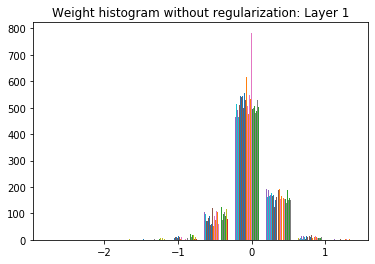

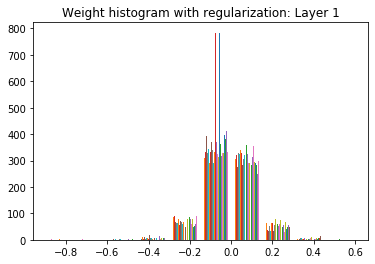

In [39]:
plt.figure(1)
plt.title("Weight histogram without regularization: Layer 1")
plt.hist(weights)
plt.figure(2)
plt.title("Weight histogram with regularization: Layer 1")
plt.hist(weights1)
plt.show()

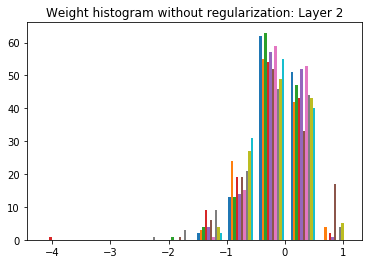

In [40]:
weights, biases = model.layers[2].get_weights()
plt.hist(weights)
plt.title("Weight histogram without regularization: Layer 2")
plt.show()

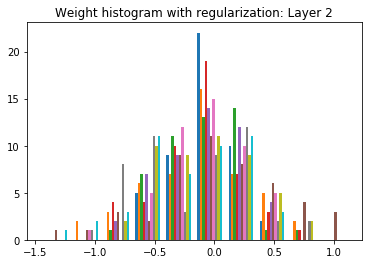

In [41]:
weights1, biases1 = model1.layers[3].get_weights()
plt.hist(weights1)
plt.title("Weight histogram with regularization: Layer 2")
plt.show()